In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [27]:
df = pd.read_excel(r"D:\Hands on Stat\optiva (1).xlsx")
df.head()

,CustomerID,LoanDefault,AverageBalance,Age,Entrepreneur,Unemployed,Married,Divorced,HighSchool,College
0,1,0,222.3,36.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,358.8,46.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0,5291.0,41.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0,249.6,47.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0,351.0,52.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
features = ['AverageBalance', 'Age', 'Entrepreneur', 'Unemployed', 'Married', 'Divorced', 'HighSchool', 'College']
X = df[features]
y = df['LoanDefault']

In [29]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
probabilities = classifier.predict_proba(X_test)[:, 1]

In [33]:
cutoff_values = np.arange(0.1, 1.0, 0.1)

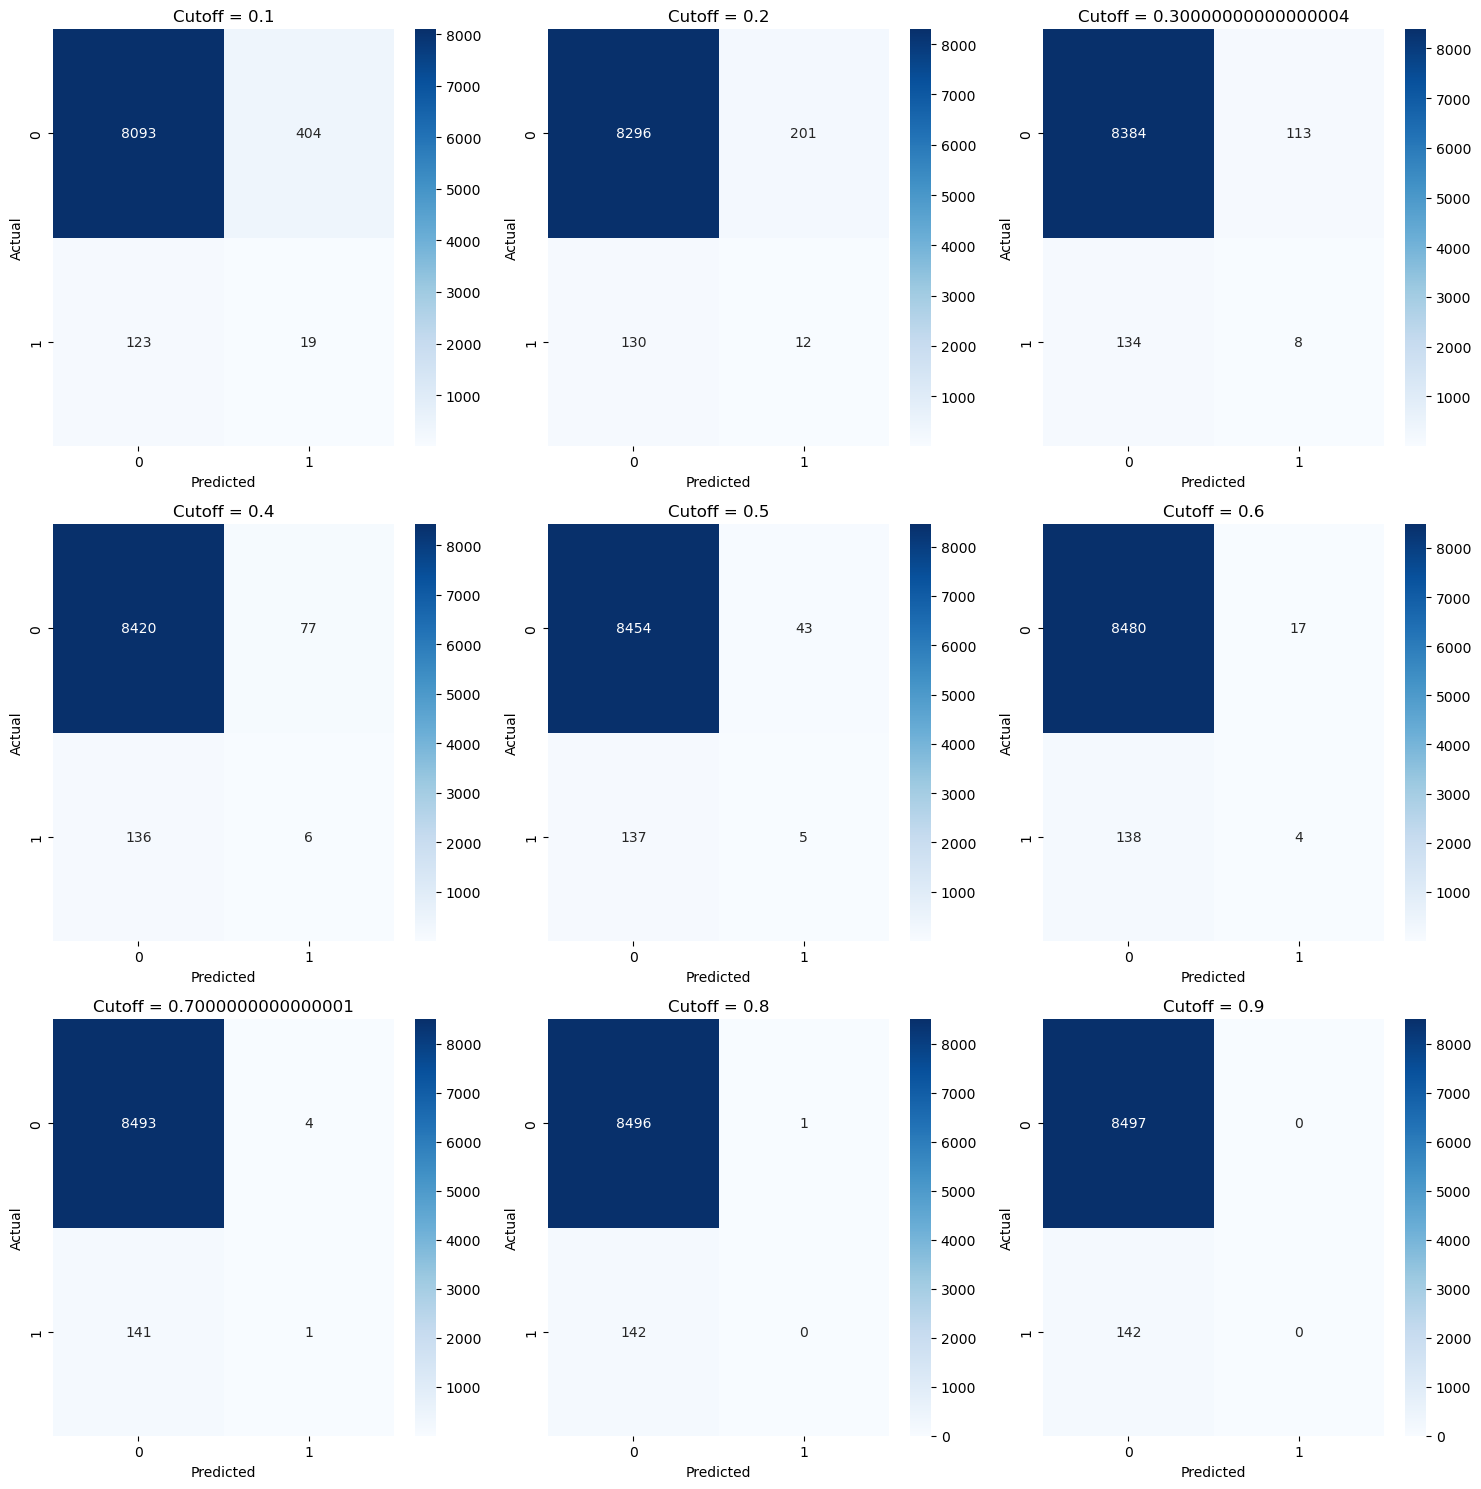

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for cutoff, ax in zip(cutoff_values, axes.flatten()):
    predicted_labels = np.where(probabilities >= cutoff, 1, 0)
    
    cm = confusion_matrix(y_test, predicted_labels)
    
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=ax
    )
    
    ax.set_title(f"Cutoff = {cutoff}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()
